In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans


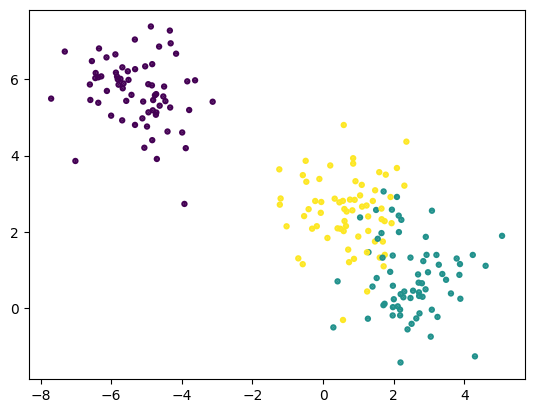

In [2]:
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.9, )
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis', marker=".", s=10, linewidths=3)

In [3]:
import scipy.spatial.distance as metric

def euclidean_dist(A, B):
    return metric.euclidean(A, B)

def plot(data,k,index,centroids,orig_centroids):
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j))
            
    colors = 10*["g","r","c","b","k"]
    j=0
    for i in input:
        plt.scatter(data[0][j,0], data[0][j,1], marker=".", color=colors[i], s=10, linewidths=3)
        j+=1
    ## New centroids
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="x", color="k", s=50, linewidths=2)
    # Original Clusters
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="o", color="DarkBlue", s=50, linewidths=1)

In [4]:
class K_Means:
    def __init__(self,k,data,centeriod_init=None):
        self.k = k
        self.data = data  
        self.centeriod_init = centeriod_init
        
    def initialise_centroids(self,centeriod_init,k,data):
        ## 3 ways to initialize centroides
        if(self.centeriod_init == 'random'): 
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
        elif(self.centeriod_init == 'firstk'):
            self.centroids = data[:k]
        else:
            for i in range(self.k):
                self.centroids.append(i%self.k)
        return self.centroids    
 
    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))
        
        cents = self.initialise_centroids(self.centeriod_init,self.k,data)
        
        # Preserve original centroids
        cents_orig = cents.copy()
        changed = True
        num_iter = 0
        
        while changed and num_iter<100:
            changed = False 
            # for each row in the dataset
            for i in range(m):
                # Track minimum distance and vector index of associated cluster
                min_dist = np.inf
                min_index = -1 
                #calculate distance 
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j 
                    # Check if cluster assignment of instance has changed
                    if cluster_assignments[i, 0] != min_index: 
                        changed = True

                # Assign instance to appropriate cluster
                cluster_assignments[i, :] = min_index, min_dist**2

            # Update centroid location
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)
    
            # Count iterations
            num_iter += 1
            #print(num_iter)

         # Return important stuff when done
        return cents, cluster_assignments, num_iter, cents_orig

/tmp/ipykernel_23636/114229515.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input.append(int(j))


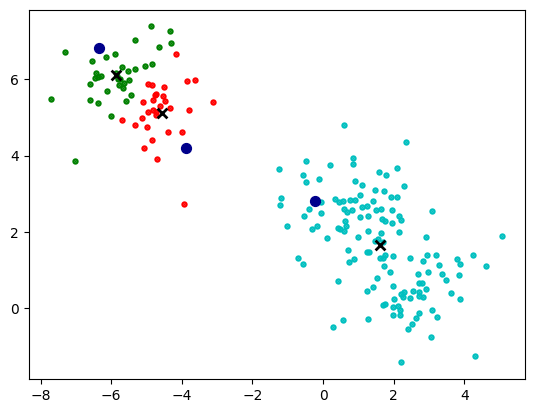

In [5]:
# Perform k-means clustering with centroids initialize='rondom'
kmeans = K_Means(k=3,data = data[0],centeriod_init='random')
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
k=3
plot(data,k,index,centroids,orig_centroids)

Text(0, 0.5, 'Dispersion')

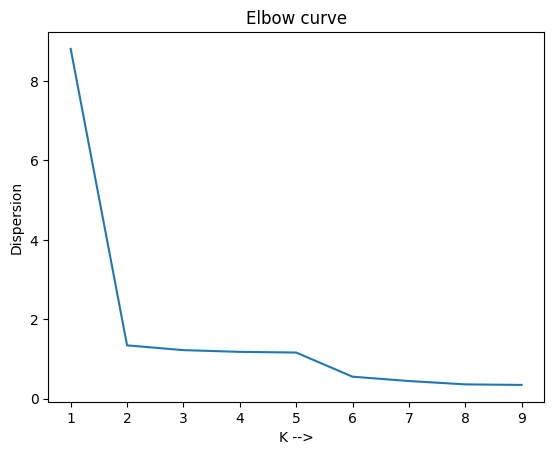

In [6]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = data[0],centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
    cost = sum(distance)/(2*len(data[0]))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)
    
x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersion")

/tmp/ipykernel_23636/678112395.py:16: RuntimeWarning: invalid value encountered in divide
  s = (dist_ji - a)/max(dist_ji,a)


Text(0, 0.5, 'Dispersion')

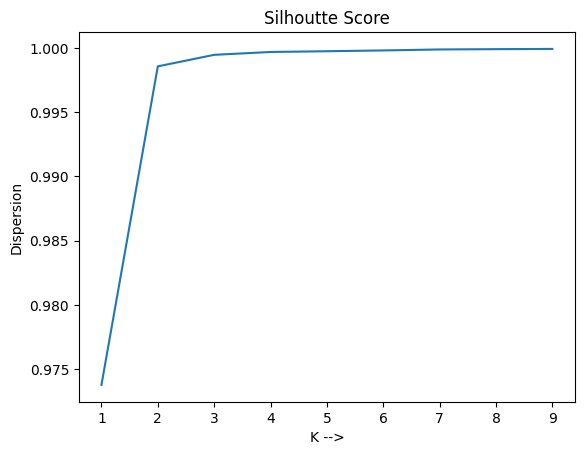

In [7]:
costs = []
for p in range(10):
    kmeans = K_Means(k=p,data = data[0],centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    X = data[0]
    dist_ji = 0
    a = 0
    s=0
    for i in range(len(data[0])):
        for j in range(p):
            dist_ji += euclidean_dist(centroids[j,:],X[i,:])
            #print(dist_ji)
    dist_ji -= sum(cluster_assignments[:,1])/len(data[0])
    a = sum(cluster_assignments[:,1])/(len(data[0])-1)
    if max(dist_ji,a) != 0:
        s = (dist_ji - a)/max(dist_ji,a)
    else:
        s = 0
        
    s = np.array(s)
    s =  s.item()
    costs.append(s)
x = np.arange(10)
plt.plot(x,costs)
plt.title("Silhoutte Score")
plt.xlabel("K -->")
plt.ylabel("Dispersion")

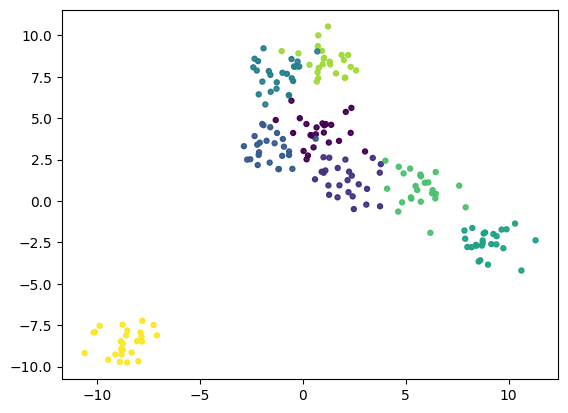

In [15]:
data1 = make_blobs(n_samples=200, n_features=2, centers=8, cluster_std=.9, random_state=0)
plt.scatter(data1[0][:,0], data1[0][:,1], c=data1[1], cmap='viridis', marker=".", s=10, linewidths=3)

/tmp/ipykernel_23636/114229515.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input.append(int(j))


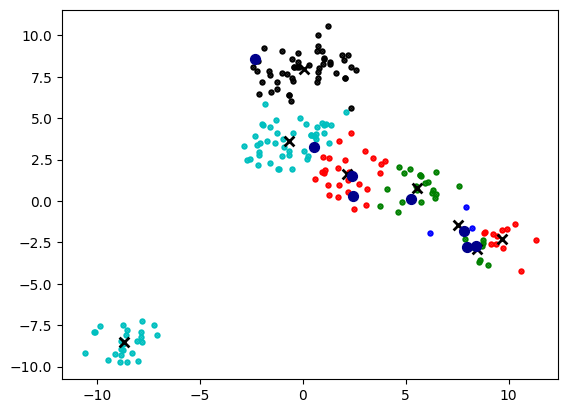

In [16]:
# Perform k-means clustering with centroids initialize='rondom'
kmeans = K_Means(k=8,data = data1[0],centeriod_init='random')
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data1[0])
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
k=8
plot(data1,k,index,centroids,orig_centroids)

In [17]:
sk_kmeans = KMeans(n_clusters=8, n_init='auto', random_state=0)

sk_kmeans.fit(data[0])
sk_kmeans_pred_res = sk_kmeans.predict(data[0])
sk_kmeans_ari = adjusted_rand_score(data[1], sk_kmeans_pred_res)
sk_kmeans_centroinds = sk_kmeans.cluster_centers_
print(f'Adjusted Rand Score for sk KMeans: {sk_kmeans_ari}', '', sep='\n')
print(sk_kmeans_centroinds, '', sep='\n')
print('prediction', sk_kmeans_pred_res, sep='\n')

Adjusted Rand Score for sk KMeans: 0.35626772791492756

[[ 2.30713133 -0.00667947]
 [-4.75825691  6.0303086 ]
 [ 1.44777409  3.0338573 ]
 [ 3.51479249  1.20606045]
 [ 1.4773185   1.4468346 ]
 [-4.52350921  4.71389707]
 [-6.27163385  5.8702359 ]
 [-0.0927965   2.60859195]]

prediction
[7 6 5 1 6 3 2 0 6 7 4 6 2 1 4 6 4 7 3 4 2 0 5 1 5 4 0 2 5 4 2 0 0 5 2 2 1
 7 3 0 4 3 5 2 2 0 1 4 0 0 6 2 4 7 2 7 3 0 3 4 6 0 1 3 4 1 7 2 7 1 4 7 0 7
 6 6 2 0 4 2 7 7 0 6 1 0 2 0 1 2 2 0 1 2 4 0 2 4 0 7 6 6 7 0 3 3 2 7 7 0 0
 0 4 1 0 6 5 2 6 7 3 6 2 7 7 6 5 2 3 4 2 7 3 4 7 5 1 4 7 1 6 2 1 5 7 7 1 0
 5 0 7 5 3 3 5 5 0 7 0 6 1 5 7 0 1 0 5 6 2 7 6 3 5 3 1 0 1 1 0 2 5 2 4 6 4
 6 3 2 3 2 4 4 7 6 0 5 1 6 6 6]


In [12]:
sk_kmeans = KMeans(n_clusters=8, n_init='auto', random_state=0)
sk_kmeans.fit(data1[0])
sk_kmeans_pred_res = sk_kmeans.predict(data1[0])
sk_kmeans_ari = adjusted_rand_score(data1[1], sk_kmeans_pred_res)
sk_kmeans_centroinds = sk_kmeans.cluster_centers_
print(f'Adjusted Rand Score for sk KMeans: {sk_kmeans_ari}', '', sep='\n')
print(sk_kmeans_centroinds, '', sep='\n')
print('prediction', sk_kmeans_pred_res, sep='\n')

Adjusted Rand Score for sk KMeans: 0.678907620412153

[[ 1.02724316  4.37320892]
 [-8.67283182 -8.53078623]
 [ 8.88245868 -2.40543307]
 [ 0.02721191  8.07055192]
 [ 2.65059358  1.17479447]
 [ 0.10139109  2.35969758]
 [ 5.72365018  0.86564661]
 [-1.83913713  3.75779047]]

prediction
[0 6 3 2 7 6 7 5 4 3 4 2 3 3 3 3 3 3 7 3 4 4 1 2 7 4 3 1 7 1 7 3 3 2 1 1 0
 5 2 5 7 7 5 2 6 4 4 2 0 2 0 0 3 1 3 1 2 3 2 6 7 7 3 5 2 6 3 3 4 7 4 1 5 7
 3 1 7 1 0 3 4 0 1 3 2 1 5 6 6 1 4 7 3 3 3 0 0 2 6 6 1 6 3 4 0 1 7 2 1 0 2
 5 2 1 5 7 1 3 1 2 3 4 3 7 4 3 4 2 3 0 2 4 3 3 0 0 2 3 0 3 5 4 3 5 2 6 1 1
 7 2 7 2 6 7 5 6 5 0 3 3 6 1 3 1 1 4 6 3 4 1 6 3 3 3 7 3 6 6 5 4 3 3 2 7 5
 6 6 3 3 4 4 2 0 2 3 5 3 0 2 6]


/tmp/ipykernel_23636/114229515.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input.append(int(j))


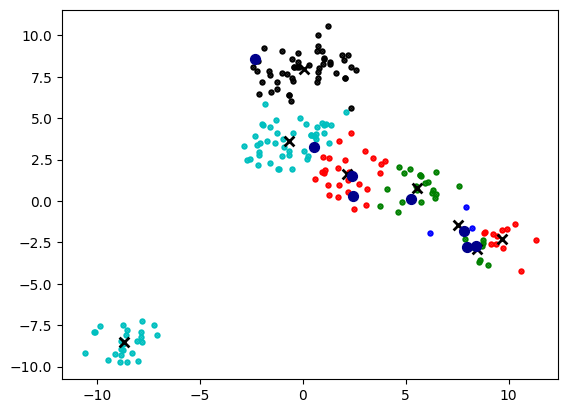

In [18]:
k=8
plot(data1,k,index,centroids,orig_centroids)